In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_m13_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        47.1005 (40.8906, 53.6699) (40.7468, 53.5013) 12.7545 (Jnode 202)\n',
 't_n104        42.3137 (35.2210, 49.6708) (35.0801, 49.5038) 14.4237 (Jnode 201)\n',
 't_n105        40.8439 (33.9649, 47.9828) (33.7981, 47.8000) 14.0018 (Jnode 200)\n',
 't_n106        36.9834 (30.6787, 43.5301) (30.6434, 43.4872) 12.8437 (Jnode 199)\n',
 't_n107        35.9687 (29.8171, 42.3621) (29.6529, 42.1884) 12.5354 (Jnode 198)\n',
 't_n108        34.1350 (28.2600, 40.2382) (28.2320, 40.1988) 11.9668 (Jnode 197)\n',
 't_n109        19.1216 (15.2777, 23.0533) (15.1691, 22.9375)  7.7684 (Jnode 196)\n',
 't_n110        18.9671 (15.1533, 22.8736) (15.1848, 22.9031)  7.7182 (Jnode 195)\n',
 't_n111        18.4644 (14.7428, 22.2767) (14.6559, 22.1822)  7.5263 (Jnode 194)\n',
 't_n112        17.8088 (14.2048, 21.5048) (14.1666, 21.4581)  7.2915 (Jnode 193)\n',
 't_n113        17.0523 (13.5899, 20.6040) (13.5569, 20.5637)  7.0068 (Jnode 192)\n',
 't_n114        12.8078 ( 9.9342, 15.8099) ( 9.8871, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[47.1005,
 42.3137,
 40.8439,
 36.9834,
 35.9687,
 34.135,
 19.1216,
 18.9671,
 18.4644,
 17.8088,
 17.0523,
 12.8078,
 9.4397,
 7.2438,
 3.6159,
 13.2574,
 11.3333,
 17.7345,
 11.7329,
 17.0359,
 13.7283,
 11.2013,
 9.7056,
 16.4743,
 15.531,
 4.0501,
 18.2548,
 16.5811,
 12.9388,
 10.3803,
 11.938,
 10.9557,
 9.2817,
 9.1273,
 31.8607,
 25.6677,
 34.2666,
 31.3957,
 29.2714,
 23.8538,
 12.5123,
 22.8851,
 20.0305,
 17.7869,
 15.0385,
 28.3805,
 26.195,
 6.1765,
 2.6801,
 38.2743,
 35.7119,
 32.058,
 31.1268,
 33.7942,
 22.3413,
 27.6559,
 21.8158,
 41.2916,
 38.9903,
 35.4461,
 33.3521,
 28.19,
 18.688,
 24.8733,
 34.8644,
 11.7324,
 35.107,
 21.0157,
 20.404,
 19.8607,
 18.882,
 17.3512,
 16.5299,
 15.9406,
 15.249,
 13.6169,
 11.8073,
 9.9897,
 13.7907,
 12.9528,
 10.2995,
 11.7088,
 14.9048,
 13.7414,
 12.71,
 11.031,
 7.5789,
 14.0449,
 12.6292,
 11.1681,
 16.4783,
 15.6188,
 14.8153,
 13.2105,
 9.8626,
 14.7783,
 9.2041,
 7.3305,
 2.6773,
 20.2257,
 17.324]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m13_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[47.2527,
 42.4818,
 40.3045,
 36.2126,
 34.8273,
 31.8912,
 18.2936,
 18.0533,
 17.1772,
 16.2904,
 15.404,
 11.4467,
 8.3035,
 6.1082,
 3.5016,
 11.9608,
 9.8598,
 16.2446,
 10.624,
 15.3898,
 12.1856,
 9.7074,
 9.0555,
 15.0873,
 13.9324,
 4.4463,
 17.034,
 15.1519,
 11.7642,
 9.339,
 10.9314,
 9.6844,
 7.9224,
 8.8521,
 29.4591,
 24.2295,
 32.6789,
 29.3278,
 26.4383,
 21.4309,
 11.8666,
 21.1109,
 17.78,
 15.2675,
 12.5322,
 26.5513,
 23.9539,
 7.5319,
 3.4592,
 36.3213,
 33.0497,
 28.6325,
 28.0656,
 31.2765,
 20.8589,
 25.5634,
 19.3773,
 40.9551,
 38.0084,
 33.8135,
 31.019,
 26.2459,
 18.479,
 22.5194,
 33.0729,
 12.6622,
 33.6801,
 23.0631,
 21.6867,
 20.486,
 19.026,
 17.1759,
 16.1321,
 15.2183,
 14.0972,
 12.2463,
 10.3966,
 8.666,
 12.5072,
 11.567,
 9.12,
 9.9068,
 14.0184,
 12.5687,
 11.2033,
 9.4167,
 6.5114,
 12.7319,
 11.26,
 9.6427,
 15.829,
 14.5918,
 13.3216,
 11.4981,
 8.2463,
 13.6989,
 8.3721,
 6.377,
 2.5228,
 22.079,
 18.6725]

In [12]:
posterior_mean_iqtree

[47.1005,
 42.3137,
 40.8439,
 36.9834,
 35.9687,
 34.135,
 19.1216,
 18.9671,
 18.4644,
 17.8088,
 17.0523,
 12.8078,
 9.4397,
 7.2438,
 3.6159,
 13.2574,
 11.3333,
 17.7345,
 11.7329,
 17.0359,
 13.7283,
 11.2013,
 9.7056,
 16.4743,
 15.531,
 4.0501,
 18.2548,
 16.5811,
 12.9388,
 10.3803,
 11.938,
 10.9557,
 9.2817,
 9.1273,
 31.8607,
 25.6677,
 34.2666,
 31.3957,
 29.2714,
 23.8538,
 12.5123,
 22.8851,
 20.0305,
 17.7869,
 15.0385,
 28.3805,
 26.195,
 6.1765,
 2.6801,
 38.2743,
 35.7119,
 32.058,
 31.1268,
 33.7942,
 22.3413,
 27.6559,
 21.8158,
 41.2916,
 38.9903,
 35.4461,
 33.3521,
 28.19,
 18.688,
 24.8733,
 34.8644,
 11.7324,
 35.107,
 21.0157,
 20.404,
 19.8607,
 18.882,
 17.3512,
 16.5299,
 15.9406,
 15.249,
 13.6169,
 11.8073,
 9.9897,
 13.7907,
 12.9528,
 10.2995,
 11.7088,
 14.9048,
 13.7414,
 12.71,
 11.031,
 7.5789,
 14.0449,
 12.6292,
 11.1681,
 16.4783,
 15.6188,
 14.8153,
 13.2105,
 9.8626,
 14.7783,
 9.2041,
 7.3305,
 2.6773,
 20.2257,
 17.324]

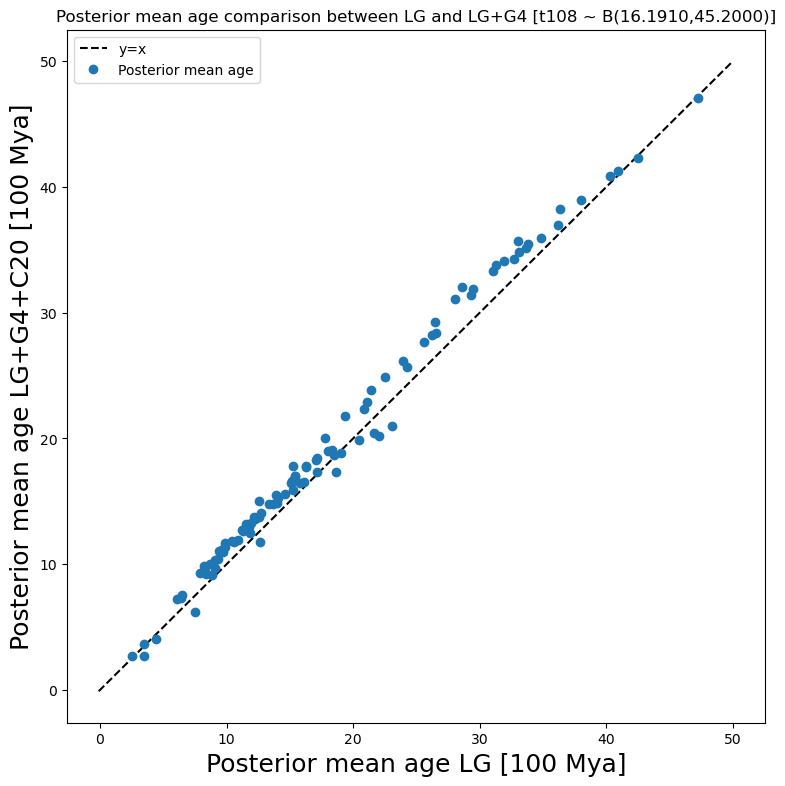

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_m13_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')